 # Name : Asad ullah
# Batch : DS2312

**Project Description**


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


**Independent Variables:**



1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases


2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions


3.	Married - This refers to applicant being in a state of matrimony


4.	Dependents - This refres to persons who depends on the applicants for survival


5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university


6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer


7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.


8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.


9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.


10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant


11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.


12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.


13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv


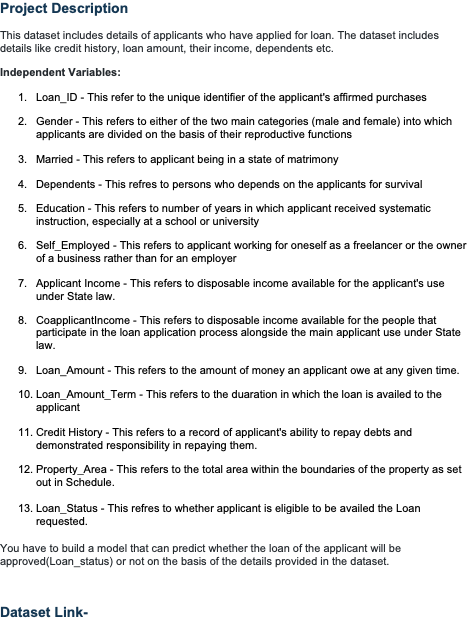

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('loan_prediction.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LP001002    613 non-null    object 
 1   Male        600 non-null    object 
 2   No          610 non-null    object 
 3   0           598 non-null    object 
 4   Graduate    613 non-null    object 
 5   No.1        581 non-null    object 
 6   5849        613 non-null    int64  
 7   0.1         613 non-null    float64
 8   Unnamed: 8  592 non-null    float64
 9   360         599 non-null    float64
 10  1           563 non-null    float64
 11  Urban       613 non-null    object 
 12  Y           613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
df.isna().sum()

LP001002       0
Male          13
No             3
0             15
Graduate       0
No.1          32
5849           0
0.1            0
Unnamed: 8    21
360           14
1             50
Urban          0
Y              0
dtype: int64

In [12]:
df=df.drop('Unnamed: 8',axis=1)

**Univariate Analysis**

Graduate
Graduate        479
Not Graduate    134
Name: count, dtype: int64


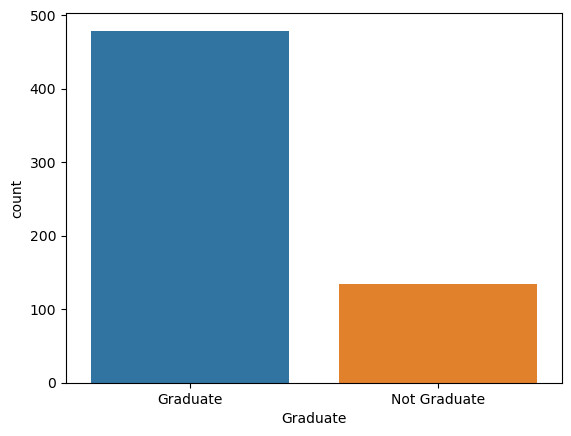

In [5]:
ax= sns.countplot(x='Graduate', data=df)
print(df['Graduate'].value_counts())

Male
Male      488
Female    112
Name: count, dtype: int64


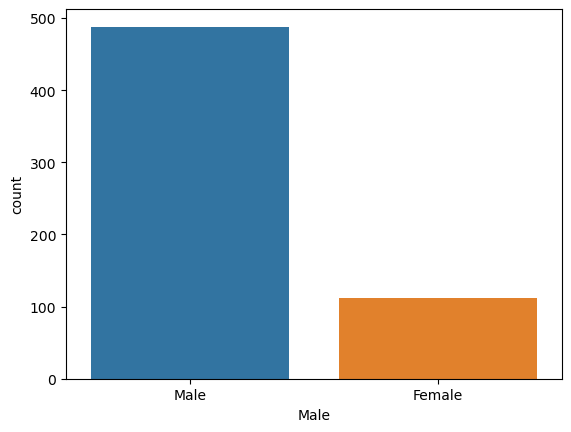

In [6]:
ax= sns.countplot(x='Male', data=df)
print(df['Male'].value_counts())

No.1
No     499
Yes     82
Name: count, dtype: int64


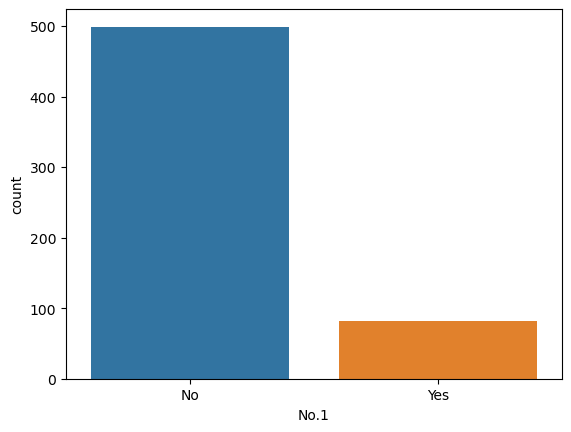

In [7]:
ax= sns.countplot(x='No.1', data=df)
print(df['No.1'].value_counts())

No
Yes    398
No     212
Name: count, dtype: int64


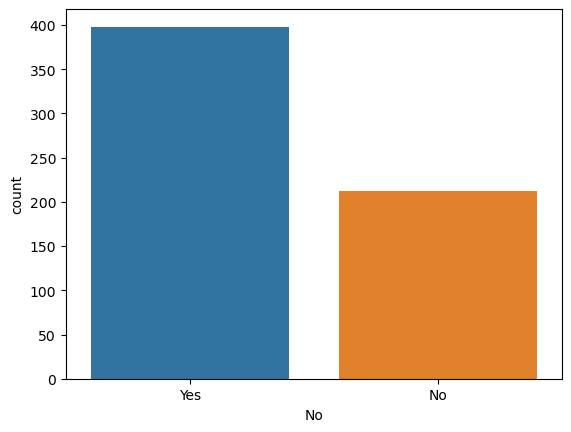

In [8]:
ax= sns.countplot(x='No', data=df)
print(df['No'].value_counts())

0
0     344
1     102
2     101
3+     51
Name: count, dtype: int64


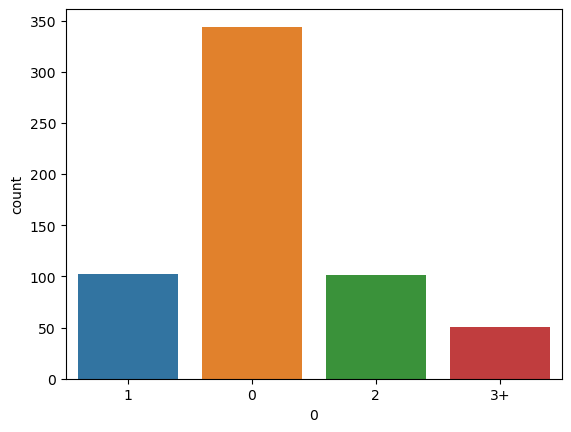

In [9]:
ax= sns.countplot(x='0', data=df)
print(df['0'].value_counts())

Urban
Semiurban    233
Urban        201
Rural        179
Name: count, dtype: int64


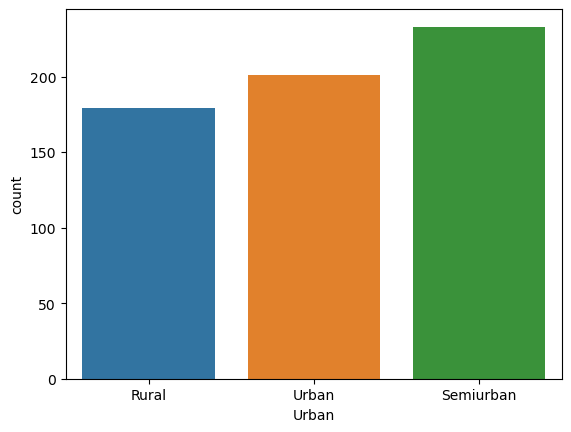

In [10]:
ax= sns.countplot(x='Urban', data=df)
print(df['Urban'].value_counts())

Y
Y    421
N    192
Name: count, dtype: int64


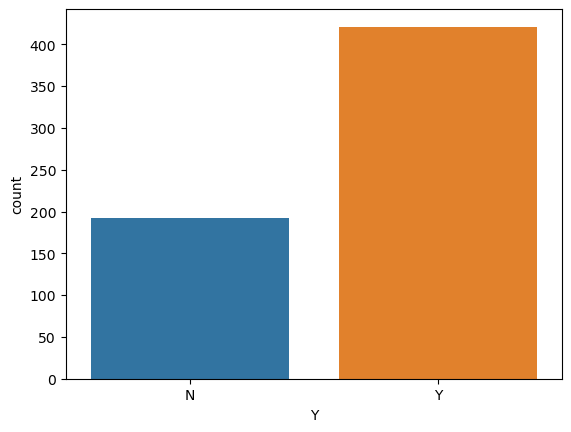

In [11]:
ax= sns.countplot(x='Y', data=df)
print(df['Y'].value_counts())

In [13]:
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,Y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LP001002  613 non-null    object 
 1   Male      600 non-null    object 
 2   No        610 non-null    object 
 3   0         598 non-null    object 
 4   Graduate  613 non-null    object 
 5   No.1      581 non-null    object 
 6   5849      613 non-null    int64  
 7   0.1       613 non-null    float64
 8   360       599 non-null    float64
 9   1         563 non-null    float64
 10  Urban     613 non-null    object 
 11  Y         613 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.6+ KB


There are so many nulls in dataset deal with that

In [15]:

from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban,Y
0,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,360.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,360.0,1.0,2.0,1.0
2,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,360.0,1.0,2.0,1.0
3,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,360.0,1.0,2.0,1.0
4,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,608.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,360.0,1.0,0.0,1.0
609,609.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,180.0,1.0,0.0,1.0
610,610.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,360.0,1.0,2.0,1.0
611,611.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,360.0,1.0,2.0,1.0


In [16]:
df.isnull().sum()

LP001002     0
Male        13
No           3
0           15
Graduate     0
No.1        32
5849         0
0.1          0
360         14
1           50
Urban        0
Y            0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer
for i in df.columns:
    imputer = KNNImputer(n_neighbors=3)
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban,Y
0,0.0,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,360.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,360.0,1.0,2.0,1.0
2,2.0,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,360.0,1.0,2.0,1.0
3,3.0,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,360.0,1.0,2.0,1.0
4,4.0,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,608.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,360.0,1.0,0.0,1.0
609,609.0,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,180.0,1.0,0.0,1.0
610,610.0,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,360.0,1.0,2.0,1.0
611,611.0,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,360.0,1.0,2.0,1.0


In [18]:
df.isnull().sum()

LP001002    0
Male        0
No          0
0           0
Graduate    0
No.1        0
5849        0
0.1         0
360         0
1           0
Urban       0
Y           0
dtype: int64

# Checking for Outliers

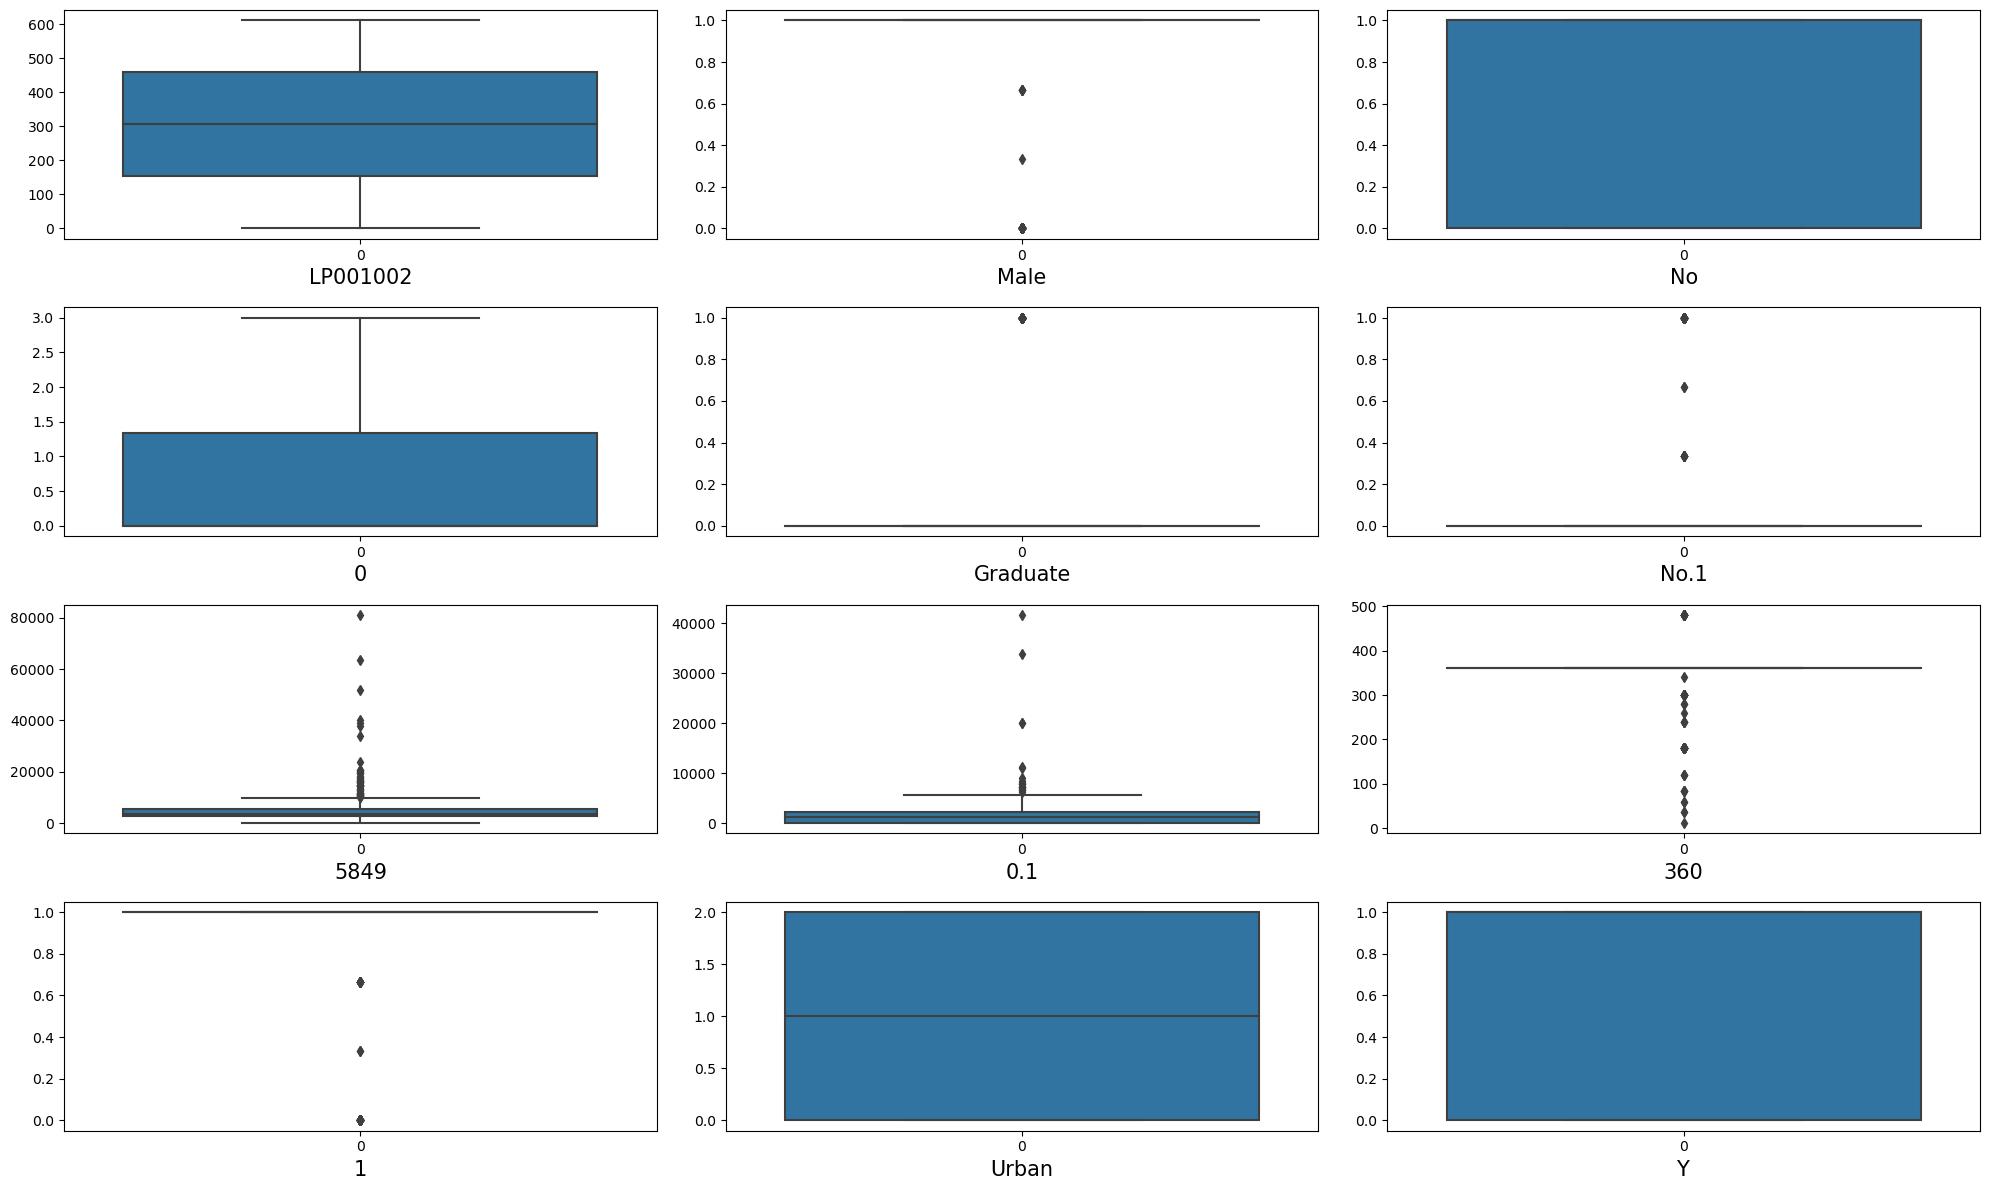

In [19]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=12:
        ax= plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [20]:
df.describe()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban,Y
count,613.000000,613.000000,613.00000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,306.000000,0.813486,0.65416,0.766721,0.218597,0.140837,5402.732463,1623.890571,341.827080,0.845024,1.035889,0.686786
std,177.102136,0.387035,0.47603,1.006043,0.413632,0.342353,6114.004114,2927.903583,64.662443,0.354065,0.787163,0.464179
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,150.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,153.000000,1.000000,0.00000,0.000000,0.000000,0.000000,2876.000000,0.000000,360.000000,1.000000,0.000000,0.000000
50%,306.000000,1.000000,1.00000,0.000000,0.000000,0.000000,3812.000000,1210.000000,360.000000,1.000000,1.000000,1.000000
75%,459.000000,1.000000,1.00000,1.333333,0.000000,0.000000,5780.000000,2302.000000,360.000000,1.000000,2.000000,1.000000
max,612.000000,1.000000,1.00000,3.000000,1.000000,1.000000,81000.000000,41667.000000,480.000000,1.000000,2.000000,1.000000


In [21]:
from scipy.stats import zscore
z_score= zscore(df)
abs_z_score = np.abs(z_score)  #Apply formula to get scalled data

filtering_entry= (abs_z_score<3).all(axis=1) # we want 3 scaler standard so we consider 3

df= df[filtering_entry]

df.describe()


,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban,Y
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,305.943782,0.810335,0.652470,0.741056,0.223169,0.137990,4889.490630,1429.139557,347.870528,0.843271,1.027257,0.689949
std,176.576058,0.389460,0.476592,0.988344,0.416726,0.339646,3408.189281,1683.337416,52.017950,0.355420,0.789829,0.462909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,152.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2874.000000,0.000000,360.000000,1.000000,0.000000,0.000000
50%,306.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3800.000000,1250.000000,360.000000,1.000000,1.000000,1.000000
75%,458.500000,1.000000,1.000000,1.333333,0.000000,0.000000,5705.500000,2253.500000,360.000000,1.000000,2.000000,1.000000
max,612.000000,1.000000,1.000000,3.000000,1.000000,1.000000,20833.000000,8980.000000,480.000000,1.000000,2.000000,1.000000


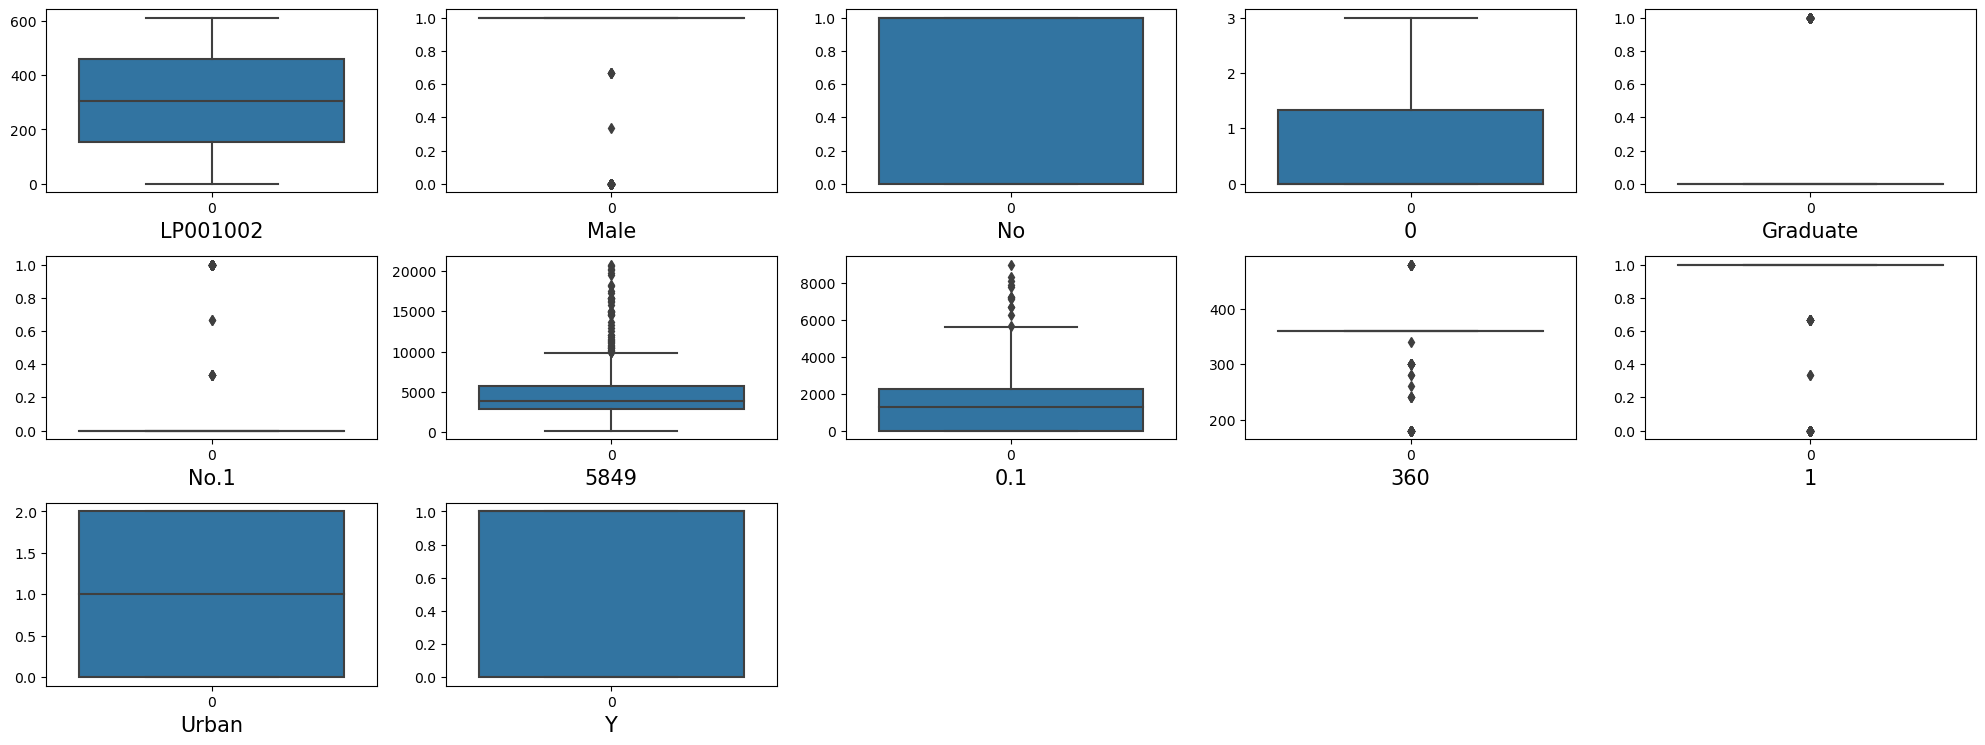

In [22]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=24:
        ax= plt.subplot(5,5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [23]:
cor= df.corr()
cor

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban,Y
LP001002,1.000000,-0.021446,-0.006640,0.070881,0.044674,0.037594,0.073245,-0.052931,-0.014499,-0.040057,-0.161944,0.028785
Male,-0.021446,1.000000,0.364456,0.188436,0.050955,-0.025420,0.023816,0.189048,-0.088480,0.004051,-0.023848,0.010863
No,-0.006640,0.364456,1.000000,0.338766,0.021707,-0.023018,0.000534,0.238919,-0.124893,0.003633,0.011608,0.090883
0,0.070881,0.188436,0.338766,1.000000,0.074254,0.042233,0.053365,-0.029464,-0.077793,-0.049338,0.006142,0.011956
Graduate,0.044674,0.050955,0.021707,0.074254,1.000000,-0.004943,-0.178359,-0.039312,-0.100059,-0.086048,-0.065175,-0.091853
No.1,0.037594,-0.025420,-0.023018,0.042233,-0.004943,1.000000,0.250561,-0.040970,-0.011350,0.000401,-0.033128,-0.024087
5849,0.073245,0.023816,0.000534,0.053365,-0.178359,0.250561,1.000000,-0.178530,-0.006948,0.063762,-0.007026,-0.008202
0.1,-0.052931,0.189048,0.238919,-0.029464,-0.039312,-0.040970,-0.178530,1.000000,-0.060355,-0.018791,-0.094111,0.044536
360,-0.014499,-0.088480,-0.124893,-0.077793,-0.100059,-0.011350,-0.006948,-0.060355,1.000000,0.039144,-0.059226,-0.011875
1,-0.040057,0.004051,0.003633,-0.049338,-0.086048,0.000401,0.063762,-0.018791,0.039144,1.000000,-0.007045,0.547735


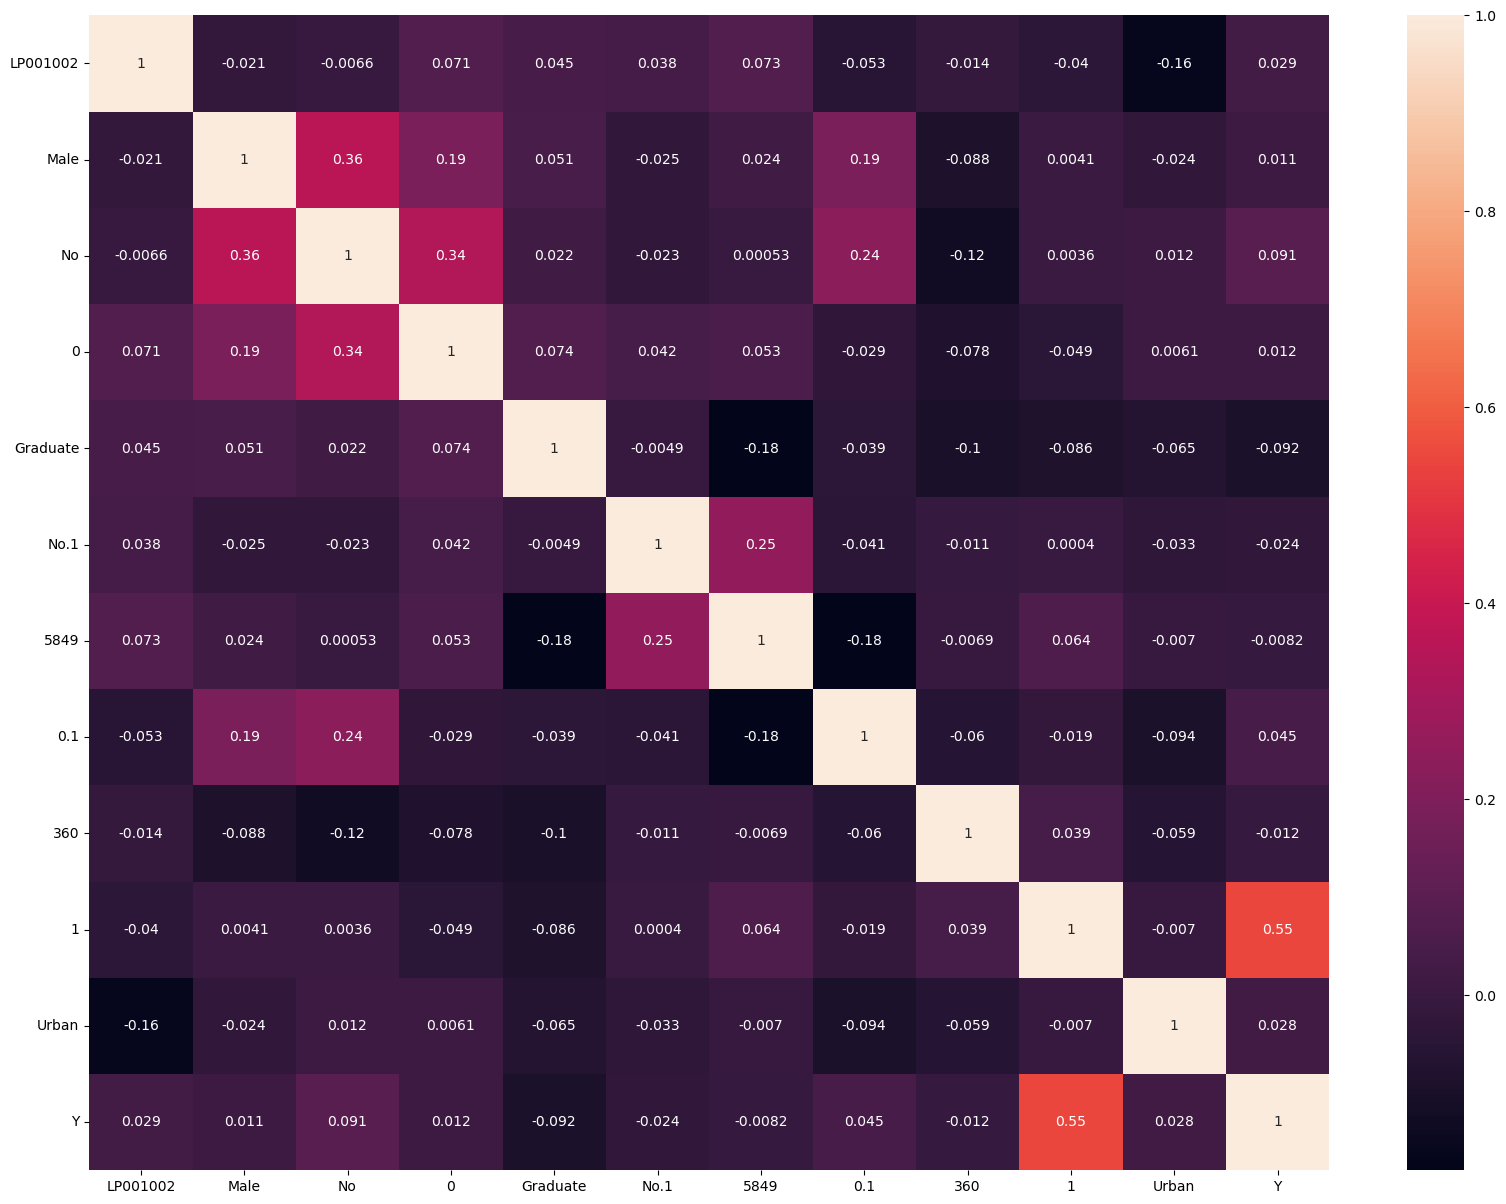

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0);
plt.show()

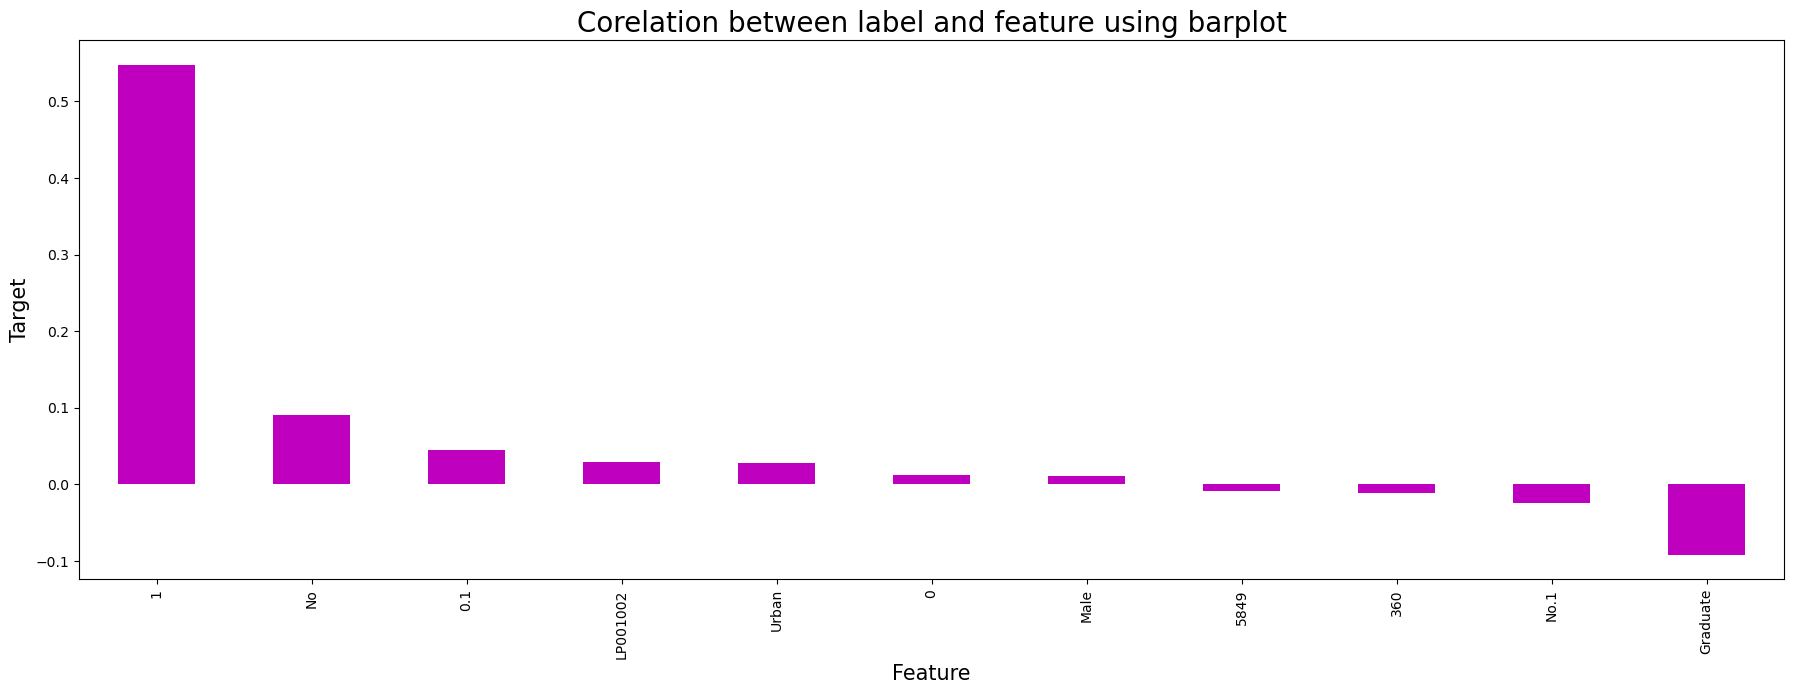

In [26]:
plt.figure(figsize=(22,7))
df.corr()['Y'].sort_values(ascending=False).drop(['Y']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [27]:
cor['Y'].sort_values(ascending=False)

Y           1.000000
1           0.547735
No          0.090883
0.1         0.044536
LP001002    0.028785
Urban       0.027821
0           0.011956
Male        0.010863
5849       -0.008202
360        -0.011875
No.1       -0.024087
Graduate   -0.091853
Name: Y, dtype: float64

**Separating label and feature**

In [28]:
x= df.drop('Y', axis=1)
y= df["Y"]

**Feature Scaling using Standard Scalarization**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,360,1,Urban
0,-1.734124,0.487410,0.729820,0.262221,-0.535986,-0.406622,-0.090004,0.046888,0.233377,0.441345,-1.301717
1,-1.728456,0.487410,0.729820,-0.750436,-0.535986,2.540131,-0.554870,-0.849716,0.233377,0.441345,1.232638
2,-1.722787,0.487410,0.729820,-0.750436,1.865721,-0.406622,-0.677327,0.552268,0.233377,0.441345,1.232638
3,-1.717119,0.487410,-1.370201,-0.750436,-0.535986,-0.406622,0.326113,-0.849716,0.233377,0.441345,1.232638
4,-1.711451,0.487410,0.729820,1.274878,-0.535986,2.540131,0.154909,1.645077,0.233377,0.441345,1.232638
...,...,...,...,...,...,...,...,...,...,...,...
582,1.712088,-2.082437,-1.370201,-0.750436,-0.535986,-0.406622,-0.584236,-0.849716,0.233377,0.441345,-1.301717
583,1.717757,0.487410,0.729820,2.287535,-0.535986,-0.406622,-0.230081,-0.849716,-3.229918,0.441345,-1.301717
584,1.723425,0.487410,0.729820,0.262221,-0.535986,-0.406622,0.934579,-0.707020,0.233377,0.441345,1.232638
585,1.729093,0.487410,0.729820,1.274878,-0.535986,-0.406622,0.790979,-0.849716,0.233377,0.441345,1.232638


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.045645,LP001002
1,1.187537,Male
2,1.337067,No
3,1.173623,0
4,1.075233,Graduate
5,1.073660,No.1
6,1.161978,5849
7,1.156541,0.1
8,1.037300,360
9,1.016024,1


In [31]:
y.value_counts()


Y
1.0    405
0.0    182
Name: count, dtype: int64

# Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS=i
print("Best Accuracy is ", maxAccu,"at random state", maxRS)

Best Accuracy is  0.8926553672316384 at random state 99


In [33]:
 x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [35]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8757062146892656
[[ 26  18]
 [  4 129]]
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        44
         1.0       0.88      0.97      0.92       133

    accuracy                           0.88       177
   macro avg       0.87      0.78      0.81       177
weighted avg       0.87      0.88      0.87       177



In [36]:
RF= RandomForestClassifier()
RF.fit(x_train, y_train)
predRF= RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8983050847457628
[[ 29  15]
 [  3 130]]
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76        44
         1.0       0.90      0.98      0.94       133

    accuracy                           0.90       177
   macro avg       0.90      0.82      0.85       177
weighted avg       0.90      0.90      0.89       177



**Gradient Boosting Classifier**

In [37]:
GB= GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.864406779661017
[[ 30  14]
 [ 10 123]]
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71        44
         1.0       0.90      0.92      0.91       133

    accuracy                           0.86       177
   macro avg       0.82      0.80      0.81       177
weighted avg       0.86      0.86      0.86       177



**AdaBoost**

In [38]:
AB= AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB= AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.8305084745762712
[[ 24  20]
 [ 10 123]]
              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62        44
         1.0       0.86      0.92      0.89       133

    accuracy                           0.83       177
   macro avg       0.78      0.74      0.75       177
weighted avg       0.82      0.83      0.82       177



**Extra tree Classifier**

In [39]:
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8248587570621468
[[ 29  15]
 [ 16 117]]
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65        44
         1.0       0.89      0.88      0.88       133

    accuracy                           0.82       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.83      0.82      0.83       177



**Cross Validation Score**

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
#Checking for cross validation score for Logistic Regression
score= cross_val_score(LR, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.79661017 0.77118644 0.79487179 0.86324786 0.82905983]
<built-in method mean of numpy.ndarray object at 0x13467fe70>
Difference between Accuracy score and Cross validation score 0.08730986527596707


In [42]:
#Checking for cross validation score for RF
score= cross_val_score(RF, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.72033898 0.76271186 0.79487179 0.85470085 0.81196581]
<built-in method mean of numpy.ndarray object at 0x13467fed0>
Difference between Accuracy score and Cross validation score 0.10938722294654502


In [43]:
#Checking for cross validation score for GB
score= cross_val_score(GB, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.69491525 0.72881356 0.79487179 0.85470085 0.75213675]
<built-in method mean of numpy.ndarray object at 0x13467f3f0>
Difference between Accuracy score and Cross validation score 0.133217441692018


In [44]:
#Checking for cross validation score for AB
score= cross_val_score(AB, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.34745763 0.74576271 0.78632479 0.82051282 0.81196581]
<built-in method mean of numpy.ndarray object at 0x13464bcf0>
Difference between Accuracy score and Cross validation score 0.1959003331884689


In [45]:
#Checking for cross validation score for ET
score= cross_val_score(ET, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.79661017 0.74576271 0.8034188  0.8034188  0.76068376]
<built-in method mean of numpy.ndarray object at 0x134a77c90>
Difference between Accuracy score and Cross validation score 0.11632623497030281


# Hyper Parameter Tunning

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [52]:
GCV= GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [53]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
GCV.best_params_